In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Unemployment in India.csv")

In [3]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [26]:
#Convert "Date" to datetime format
df.columns = df.columns.str.strip()
# 3️⃣ Convert 'Date' and Extract Features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.dropna(inplace=True)

In [31]:
# One-hot encode 'Area'
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Area'])
    ], remainder='passthrough')


In [13]:
# Create pipeline with preprocessing and model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

/var/folders/yj/9wfz_8rx43q67nx6ltqgdbbw0000gn/T/ipykernel_28736/2864589367.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ci=None, marker="o", color='blue')


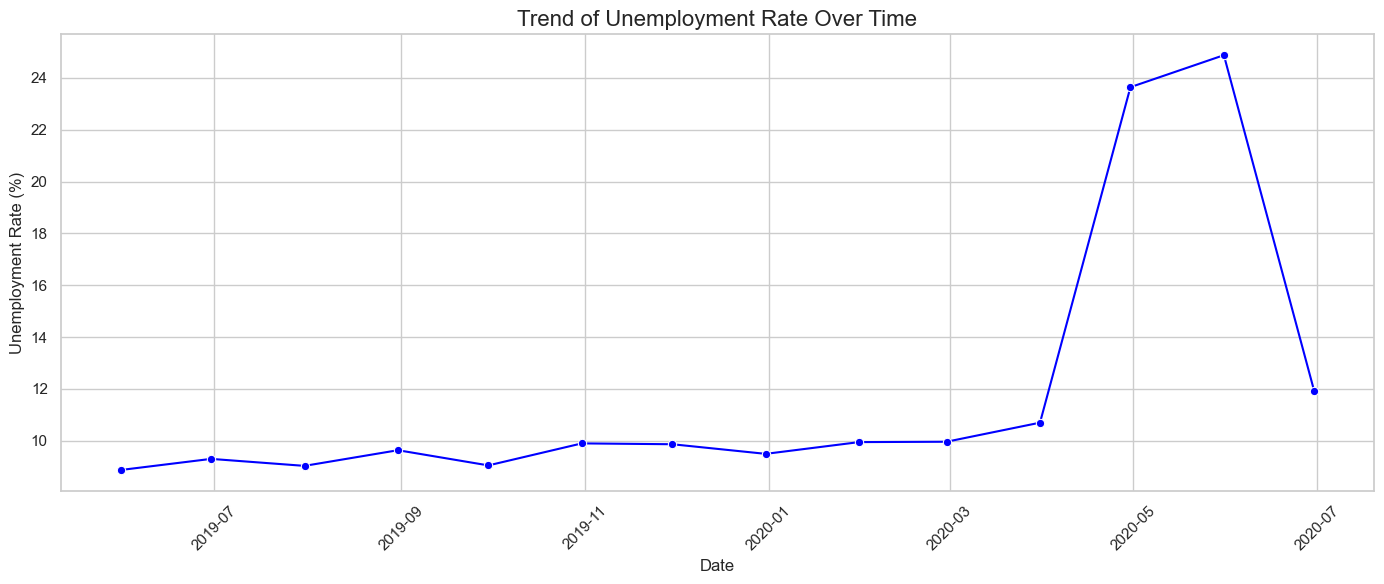

In [34]:
# Line plot to show unemployment trends by region
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the overall trend of unemployment rates over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ci=None, marker="o", color='blue')
plt.title('Trend of Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

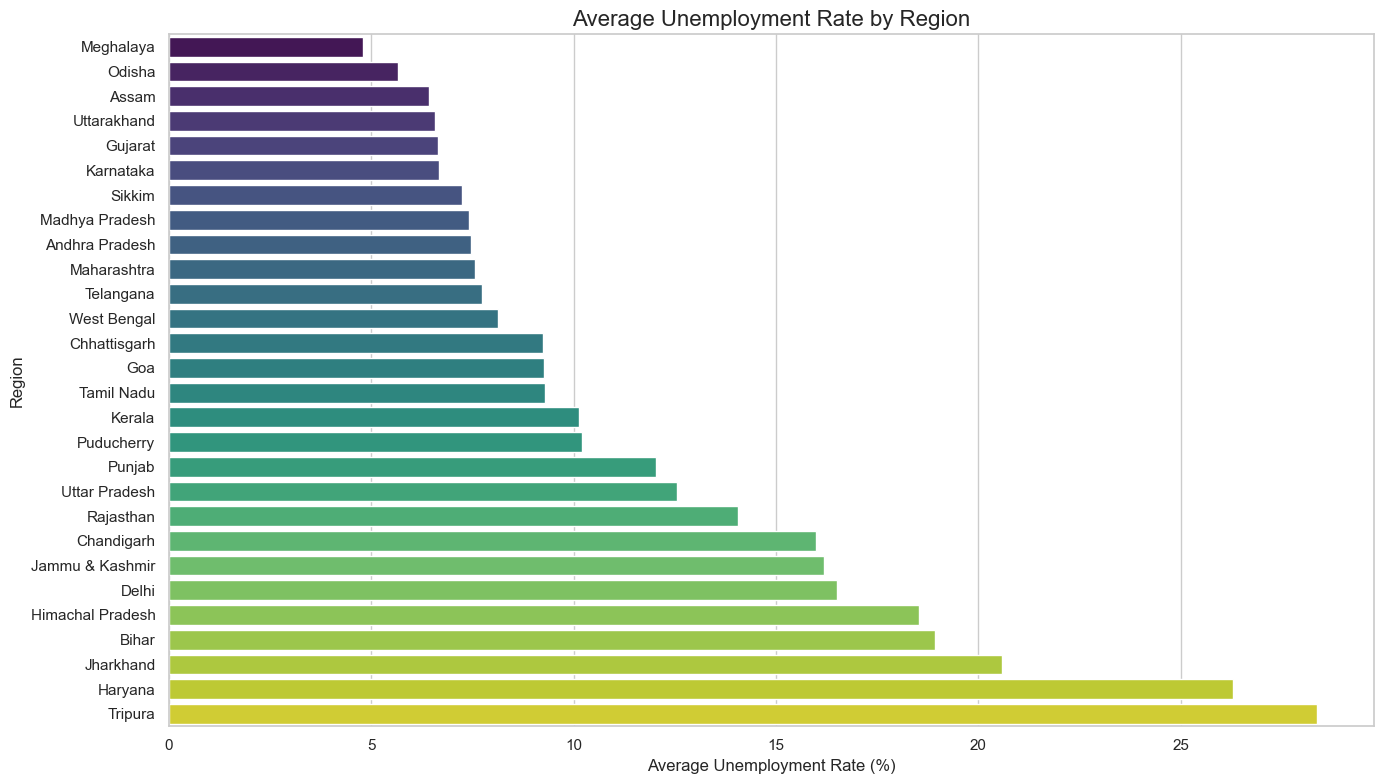

In [35]:
# Calculate average unemployment rate by region
region_avg_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Plot the average unemployment rate by region with updated palette usage
plt.figure(figsize=(14, 8))
sns.barplot(x=region_avg_unemployment, y=region_avg_unemployment.index, hue=region_avg_unemployment.index, palette="viridis", dodge=False, legend=False)
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()


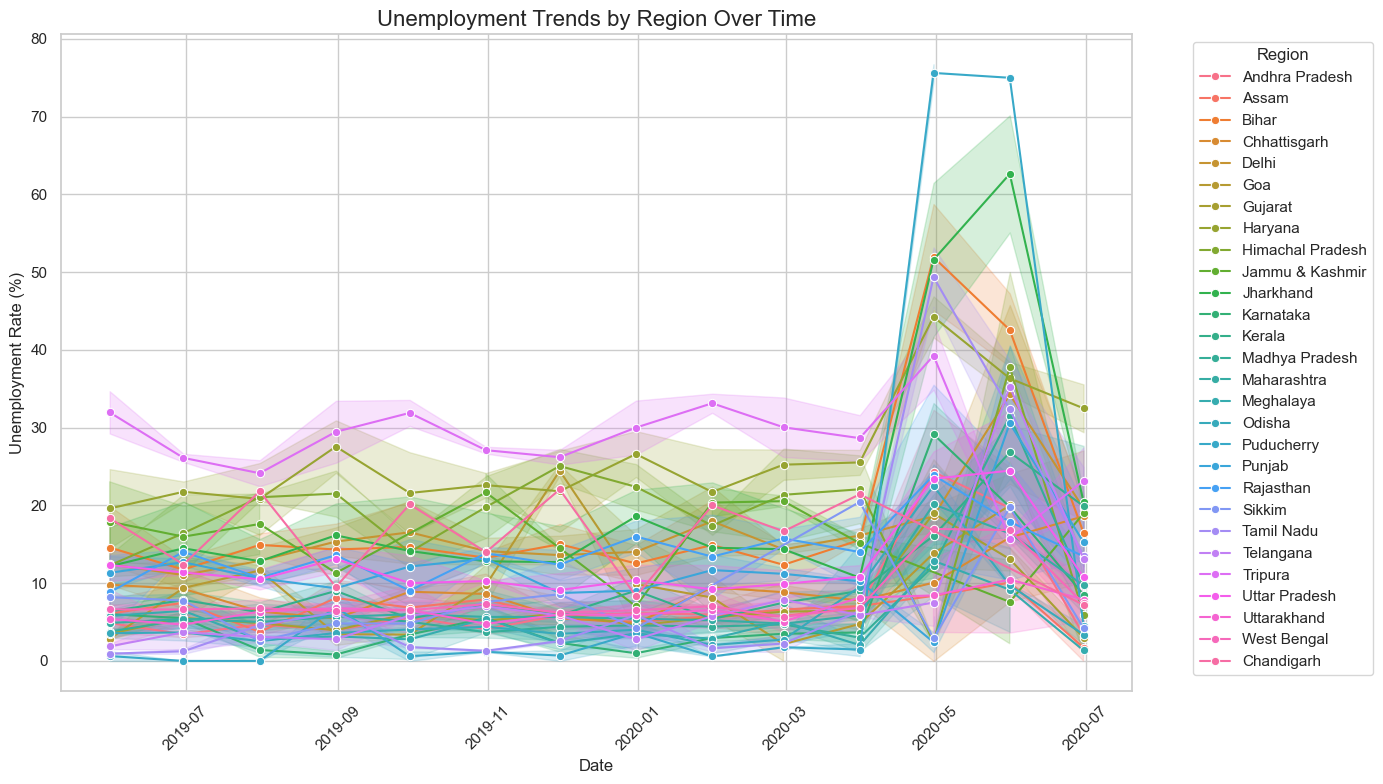

In [36]:
# Line plot to show unemployment trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Date', 
    y='Estimated Unemployment Rate (%)', 
    hue='Region', 
    data=df, 
    marker='o'
)
plt.title('Unemployment Trends by Region Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
